http://dbdesc.com/output_samples/htmlbrowse_northwind.html<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html

# Case Study: Northwind Traders


## convert sql db tables into pandas df


##### import packages and modules

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from math import sqrt
import math
import copy
import statsmodels.api as sm             #for ANOVA
from statsmodels.formula.api import ols  #for ANOVA

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import session, sessionmaker
from sqlalchemy import inspect # so we can perform high level investigations


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn')
from matplotlib import style

pd.set_option('display.max_columns', None)





##### creating an engine object and a session to connect and work with the Northwind sql db

In [2]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo = True)
Session = sessionmaker(bind = engine)
session = Session
inspector = inspect(engine)

2019-04-28 23:24:36,702 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-28 23:24:36,707 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,708 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-28 23:24:36,708 INFO sqlalchemy.engine.base.Engine ()


##### looking at the table names

In [3]:
inspector.get_table_names()

2019-04-28 23:24:36,716 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-28 23:24:36,717 INFO sqlalchemy.engine.base.Engine ()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

##### For the first question, we only need Quantity and Discount though, I will aggregate all tables since we will need them later

##### map the db table features with their headings

In [4]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base # creates a framework that clones the db structure so that it can generate a 
                                                  # a new model in which to map the db with its metadata, ie, column headings

In [5]:
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata = metadata)
Base.prepare()



Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, EmployeeTerritory, Order, OrderDetail,\
Product, Region, Shipper, Supplier, Territory = \
Base.classes.Category,\
Base.classes.Customer,\
Base.classes.CustomerCustomerDemo,\
Base.classes.CustomerDemographic, \
Base.classes.Employee, \
Base.classes.EmployeeTerritory,\
Base.classes.Order,\
Base.classes.OrderDetail, \
Base.classes.Product, \
Base.classes.Region,\
Base.classes.Shipper, \
Base.classes.Supplier, \
Base.classes.Territory

2019-04-28 23:24:36,743 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-28 23:24:36,743 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,745 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-28 23:24:36,746 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,748 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-28 23:24:36,750 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,751 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-04-28 23:24:36,752 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,753 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-28 23:24:36,754 INFO sqlalchemy.engine.base.Engin

2019-04-28 23:24:36,826 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-04-28 23:24:36,826 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,827 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-04-28 23:24:36,828 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,829 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-28 23:24:36,830 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,831 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-28 23:24:36,832 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,833 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-04-28 23:24:36,834 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,835 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-04-28 23:24:36,909 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-04-28 23:24:36,909 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,911 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-28 23:24:36,912 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,913 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-04-28 23:24:36,914 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,915 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-28 23:24:36,916 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,917 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-04-28 23:24:36,918 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,919 INFO 

##### converting each table to a pandas dataframe

In [6]:
category_df= pd.read_sql_query("SELECT * FROM [category]", engine)
customer_df = pd.read_sql_query("SELECT * FROM [customer]", engine)
customerCustomerDemo_df = pd.read_sql_query("SELECT * FROM [customerCustomerDemo]", engine)
customerDemographic_df = pd.read_sql_query("SELECT * FROM [customerDemographic]", engine)
employee_df = pd.read_sql_query("SELECT * FROM [employee]", engine)
employeeTerritory_df = pd.read_sql_query("SELECT * FROM [employeeTerritory]", engine)
order_df = pd.read_sql_query("SELECT * FROM [order]", engine)
orderDetail_df = pd.read_sql_query("SELECT * FROM [orderDetail]", engine)
product_df = pd.read_sql_query("SELECT * FROM [product]", engine)
region_df = pd.read_sql_query("SELECT * FROM [region]", engine)
shipper_df = pd.read_sql_query("SELECT * FROM [shipper]", engine)
supplier_df = pd.read_sql_query("SELECT * FROM [supplier]", engine)
territory_df = pd.read_sql_query("SELECT * FROM [territory]", engine)

2019-04-28 23:24:36,969 INFO sqlalchemy.engine.base.Engine SELECT * FROM [category]
2019-04-28 23:24:36,970 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,974 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customer]
2019-04-28 23:24:36,975 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,983 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerCustomerDemo]
2019-04-28 23:24:36,983 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,986 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerDemographic]
2019-04-28 23:24:36,987 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,991 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employee]
2019-04-28 23:24:36,992 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:36,998 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employeeTerritory]
2019-04-28 23:24:36,998 INFO sqlalchemy.engine.base.Engine ()
2019-04-28 23:24:37,003 INFO sqlalchemy.engine.base.Engine SELECT * FROM [order]
2019-04-28 

##### For question one, we need Quantity and Discount features, which are in the Order Detail table

In [7]:
orderDetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [8]:
q1df = copy.deepcopy(orderDetail_df[["Quantity", "Discount"]])
q1df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [9]:
q1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
Quantity    2155 non-null int64
Discount    2155 non-null float64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


In [10]:
q1df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

##### remove irrelevant discount levels based on the extremely low number of observations

In [11]:
q1df = copy.deepcopy(q1df[q1df.Discount.isin([ 0.05, 0.10, 0.20, 0.15, 0.25, 0.00])])

#q1df = q1df[q1df.Discount.isin([ 0.05, 0.10, 0.20, 0.15, 0.25, 0.00])]

In [12]:
q1df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [13]:
q1df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


##### must split discount column into two groups; one for those with and another without a discount

In [14]:
q1_wDis = q1df[q1df.Discount > 0.0]
q1_woDis = q1df[q1df.Discount == 0.0]

In [15]:
q1_wDis.Quantity.mean()

27.35421686746988

In [16]:
q1_woDis.Quantity.mean()

21.715261958997722

## Question 1: 
##### is there a difference is quantity ordered between no discount and having a discount?

t test on the two groups

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


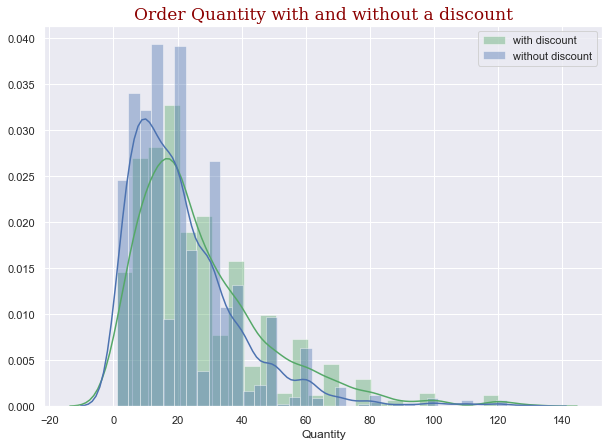

In [17]:
plt.style.use("dark_background")
#sns.set_color_codes("bright")
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(q1_wDis.Quantity, color = "g", label = "with discount") 
sns.distplot(q1_woDis.Quantity, color = "b", label = "without discount") 

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17,
        }

plt.title("Order Quantity with and without a discount", fontdict=font)
plt.legend()

In [18]:
print("skewness for distribution with discount is:", skew(q1_wDis.Quantity))
print("skewness for distribution without discount is:", skew(q1_woDis.Quantity))

skewness for distribution with discount is: 1.5909370768885505
skewness for distribution without discount is: 1.9115988573935339


##### The distributions have a semblance of normality but are highly skewed with a measure of ~1.6 and 1.9 for with a discount and without a discount, respectiveley.  

In [19]:
stats.ttest_ind( q1_wDis.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=6.511219067380875, pvalue=1.0051255540843165e-10)

### our t value tells us we have a significant difference in sample means and the p value tells us there is a very small probability the result is by chance so, we have evidence to reject the null hypothesis and accept the alternative, i.e., we have sifficient evidence to assert that discounts to have a statistically significant effect on order quantities. 

### for the next part of the question, we must determine if there is a certain level of discount that precipitates an increase in order size

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154

In [20]:
df_05 = q1df[q1df.Discount == 0.05]
df_10 = q1df[q1df.Discount == 0.10]
df_15 = q1df[q1df.Discount == 0.15]
df_20 = q1df[q1df.Discount == 0.20]
df_25 = q1df[q1df.Discount == 0.25]



In [21]:
stats.ttest_ind(df_05.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.700844260760871, pvalue=0.00027233494432847593)

In [22]:
stats.ttest_ind( df_10.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=2.094434281933477, pvalue=0.0374559661063408)

In [23]:
stats.ttest_ind( df_15.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.8356620426605934, pvalue=0.00017220729443627393)

In [24]:
stats.ttest_ind( df_20.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.4021239132172787, pvalue=0.0008110033254043408)

In [25]:
stats.ttest_ind( df_25.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.8572676240072523, pvalue=0.00015923050922125637)

### We can see that all levels of dicount have a significant effect on the quantity of orders though, a 10% discount has a lesser effect compared to the others which are more in line with each other

## Question 2 
#### Is there an area/region that outperforms the others in terms of order quantities?

In [26]:
category_df.rename(columns = {"Id":"CategoryId"}, inplace = True)
cat_prod_df = pd.merge(category_df, product_df, on = "CategoryId" )
cat_prod_df.rename(columns = {"Id": "ProductId"}, inplace = True)
cat_prod_OrDtl_df = pd.merge(cat_prod_df, orderDetail_df, on = "ProductId")
order_df.rename(columns = {"Id" : "OrderId"}, inplace = True)
cat_prod_OrDtl_orders_df = pd.merge(cat_prod_OrDtl_df, order_df, on = "OrderId" )
customer_df.rename(columns ={"Id": "CustomerId"}, inplace = True)
data = pd.merge(cat_prod_OrDtl_orders_df, customer_df, on = "CustomerId")
data.head()

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,14.4,45,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
1,6,Meat/Poultry,Prepared meats,53,Perth Pasties,24,48 pieces,32.8,0,0,0,1,10285/53,10285,26.2,36,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
2,8,Seafood,Seaweed and fish,40,Boston Crab Meat,19,24 - 4 oz tins,18.4,123,0,30,0,10285/40,10285,14.7,40,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10691/1,10691,18.0,30,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",43,Ipoh Coffee,20,16 - 500 g tins,46.0,17,10,25,0,10691/43,10691,46.0,40,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 40 columns):
CategoryId         2078 non-null int64
CategoryName       2078 non-null object
Description        2078 non-null object
ProductId          2078 non-null int64
ProductName        2078 non-null object
SupplierId         2078 non-null int64
QuantityPerUnit    2078 non-null object
UnitPrice_x        2078 non-null float64
UnitsInStock       2078 non-null int64
UnitsOnOrder       2078 non-null int64
ReorderLevel       2078 non-null int64
Discontinued       2078 non-null int64
Id                 2078 non-null object
OrderId            2078 non-null int64
UnitPrice_y        2078 non-null float64
Quantity           2078 non-null int64
Discount           2078 non-null float64
CustomerId         2078 non-null object
EmployeeId         2078 non-null int64
OrderDate          2078 non-null object
RequiredDate       2078 non-null object
ShippedDate        2008 non-null object
ShipVia            2

In [28]:
q2df = data[["Region", "Quantity"]]
q2df.head()

,Region,Quantity
0,Western Europe,45
1,Western Europe,36
2,Western Europe,40
3,Western Europe,30
4,Western Europe,40


In [29]:
q2df["Region"] = q2df["Region"].astype("category") #convert feature to category type
q2df["Region"] = q2df.Region.cat.codes             # lable encode--convert text into numbers
q2df.head()

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,Quantity
0,8,45
1,8,36
2,8,40
3,8,30
4,8,40


In [30]:
q2df = pd.get_dummies(q2df, columns = ["Region"]) # one-hot-encode


In [31]:
q2df = copy.deepcopy(q2df)
q2df.head()

,Quantity,Region_0,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8
0,45,0,0,0,0,0,0,0,0,1
1,36,0,0,0,0,0,0,0,0,1
2,40,0,0,0,0,0,0,0,0,1
3,30,0,0,0,0,0,0,0,0,1
4,40,0,0,0,0,0,0,0,0,1


##### ANOVA test
formula for the ANOVA test is:

```Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X```

they call it "Control Column" though, to me it should be called the dependant or, what you are looking to see an effect on

** *We indicate categorical variables by wrapping them with ```C() ```**

In [32]:
formula = "Quantity ~ C(Region_0) + C(Region_1) + C(Region_2) + C(Region_3) + C(Region_4) + C(Region_5)\
+ C(Region_6) + C(Region_7) + C(Region_8)"
           
lm = ols(formula, q2df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df           F        PR(>F)
C(Region_0)    5771.108001     1.0   16.561567  4.886478e-05
C(Region_1)    1982.623241     1.0    5.689609  1.715519e-02
C(Region_2)     466.230842     1.0    1.337960  2.475275e-01
C(Region_3)   25057.877279     1.0   71.909538  4.220311e-17
C(Region_4)    5486.219915     1.0   15.744013  7.498839e-05
C(Region_5)     600.807523     1.0    1.724160  1.893040e-01
C(Region_6)    2693.291573     1.0    7.729041  5.483135e-03
C(Region_7)     934.537403     1.0    2.681877  1.016481e-01
C(Region_8)   41507.489166     1.0  119.115612  5.296972e-27
Residual     720971.784575  2069.0         NaN           NaN


From the above ANOVA table, we see that we have significant events for all regions except for region 2, region 5 and region 7. Of the regions with significant tests (0,1,3,4,6,8), regions 3 and 8 have means that far exceed the others.  The take-away is that we need to dive deeper into those regions and consider shifting resources.

## Question 3
#### are there any salespeople that stand out?

In [33]:
q3df = data[["Quantity", "EmployeeId"]]
q3df.head()

,Quantity,EmployeeId
0,45,1
1,36,1
2,40,1
3,30,2
4,40,2


In [35]:
q3df.EmployeeId.value_counts()

4    408
1    341
3    313
8    248
2    237
6    161
7    150
5    113
9    107
Name: EmployeeId, dtype: int64

EmployeeId is already numeric so, can skip label encoding and go straight to get dummies

In [36]:
q3dfv2 = copy.deepcopy(pd.get_dummies(q3df, columns = ["EmployeeId"])) # one-hot-encode

In [37]:
q3dfv2.head()

,Quantity,EmployeeId_1,EmployeeId_2,EmployeeId_3,EmployeeId_4,EmployeeId_5,EmployeeId_6,EmployeeId_7,EmployeeId_8,EmployeeId_9
0,45,1,0,0,0,0,0,0,0,0
1,36,1,0,0,0,0,0,0,0,0
2,40,1,0,0,0,0,0,0,0,0
3,30,0,1,0,0,0,0,0,0,0
4,40,0,1,0,0,0,0,0,0,0


In [38]:
formula = "Quantity ~ C(EmployeeId_1) + C(EmployeeId_2) + C(EmployeeId_3) + C(EmployeeId_4) + C(EmployeeId_5) + C(EmployeeId_6)\
+ C(EmployeeId_7) + C(EmployeeId_8) + C(EmployeeId_9)"
           
lm = ols(formula, q3dfv2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq      df          F    PR(>F)
C(EmployeeId_1)     340.854936     1.0   0.932931  0.334215
C(EmployeeId_2)    3147.921070     1.0   8.615959  0.003369
C(EmployeeId_3)    2624.747864     1.0   7.184018  0.007414
C(EmployeeId_4)    1187.522249     1.0   3.250286  0.071556
C(EmployeeId_5)    1750.678322     1.0   4.791662  0.028709
C(EmployeeId_6)     191.146586     1.0   0.523174  0.469573
C(EmployeeId_7)    6447.632335     1.0  17.647373  0.000028
C(EmployeeId_8)     206.650793     1.0   0.565610  0.452094
C(EmployeeId_9)    1267.128031     1.0   3.468169  0.062702
Residual         755928.433022  2069.0        NaN       NaN


we dont have sufficient data to say anything about employees 1, 6 or 8 though, we should gather more data, look deeper and think about training or write-ups.
Employee 7 is a superstar so, may want to wory abouyt keeping her and or see if theres anythign she can teach her peers.

## Question 4
#### are there any categories we should think about dicontinuing or expanding on?

In [39]:
q4df = data[["Quantity", "CategoryId"]]
q4df.CategoryId.value_counts()

1    389
4    350
3    321
8    319
2    209
5    190
6    168
7    132
Name: CategoryId, dtype: int64

In [41]:
q4df = copy.deepcopy(pd.get_dummies(q4df, columns = ["CategoryId"])) # one-hot-encode

In [42]:
q4df.head()

,Quantity,CategoryId_1,CategoryId_2,CategoryId_3,CategoryId_4,CategoryId_5,CategoryId_6,CategoryId_7,CategoryId_8
0,45,1,0,0,0,0,0,0,0
1,36,0,0,0,0,0,1,0,0
2,40,0,0,0,0,0,0,0,1
3,30,1,0,0,0,0,0,0,0
4,40,1,0,0,0,0,0,0,0


In [43]:
formula = "Quantity ~ C(CategoryId_1) + C(CategoryId_2) + C(CategoryId_3) + C(CategoryId_4) + C(CategoryId_5) + C(CategoryId_6)\
+ C(CategoryId_7) + C(CategoryId_8) "
           
lm = ols(formula, q4df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq      df          F    PR(>F)
C(CategoryId_1)    2052.627558     1.0   5.586198  0.018194
C(CategoryId_2)    2992.424170     1.0   8.143841  0.004364
C(CategoryId_3)    2391.615514     1.0   6.508749  0.010806
C(CategoryId_4)    5522.924774     1.0  15.030564  0.000109
C(CategoryId_5)    1134.337271     1.0   3.087083  0.079064
C(CategoryId_6)    2083.430253     1.0   5.670027  0.017347
C(CategoryId_7)     142.712229     1.0   0.388389  0.533216
C(CategoryId_8)    2197.735170     1.0   5.981106  0.014543
Residual         760613.779368  2070.0        NaN       NaN


not enough data for categories 5 and 7<br>
category 4 -- maybe we roll out more of it